<a href="https://colab.research.google.com/github/JainArpit-07/PRODIGY_DS_04/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
data = pd.read_csv('/content/twitter_training.csv')
v_data = pd.read_csv('/content/twitter_validation.csv')

In [31]:
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [32]:
v_data

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [33]:
data.columns = ['id', 'game', 'sentiment', 'text']
v_data.columns = ['id', 'game', 'sentiment', 'text']

In [34]:
data.head()

,id,game,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [35]:
v_data.head()

,id,game,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [36]:
data.shape

(74681, 4)

In [37]:
data.columns

Index(['id', 'game', 'sentiment', 'text'], dtype='object')

In [38]:
id_types = data['id'].value_counts()
id_types

5203    6
6164    6
6141    6
6142    6
6143    6
       ..
4678    6
4679    6
4680    6
4681    6
2401    5
Name: id, Length: 12447, dtype: int64

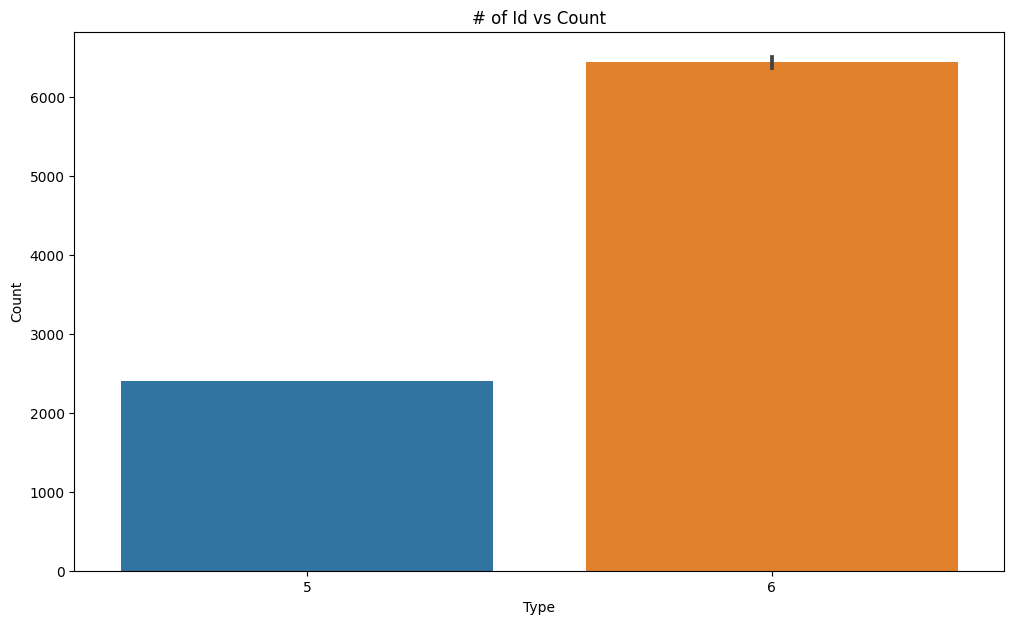

In [39]:
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of Id vs Count')
plt.show()

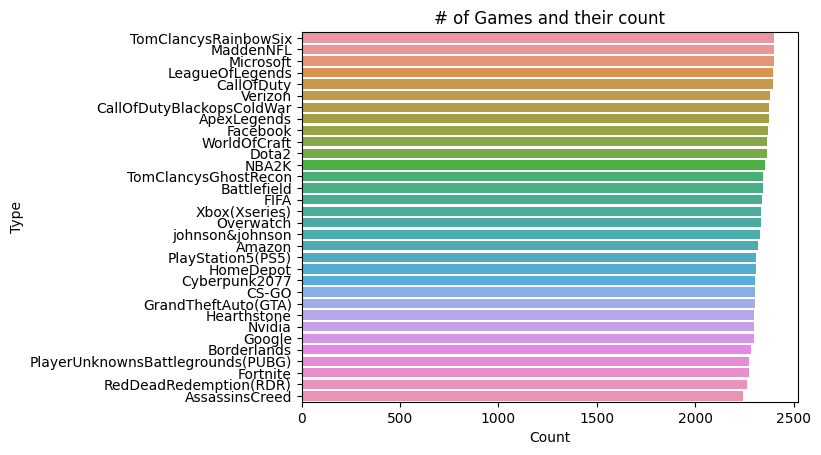

In [40]:
game_types = data['game'].value_counts()
sns.barplot(x=game_types.values,y=game_types.index)
plt.title('# of Games and their count')
plt.ylabel('Type')
plt.xlabel('Count')

plt.show()

In [41]:
data.dropna(subset=['text'],inplace=True)

total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  73995


,Total Missing,In Percent
id,0,0.0
game,0,0.0
sentiment,0,0.0
text,0,0.0


In [42]:
train0=data[data['sentiment']=="Negative"]
train1=data[data['sentiment']=="Positive"]
train2=data[data['sentiment']=="Irrelevant"]
train3=data[data['sentiment']=="Neutral"]

In [43]:
train0.shape, train1.shape, train2.shape, train3.shape

((22358, 4), (20654, 4), (12875, 4), (18108, 4))

In [44]:
train0=train0[:int(train0.shape[0]/12)]
train1=train1[:int(train1.shape[0]/12)]
train2=train2[:int(train2.shape[0]/12)]
train3=train3[:int(train3.shape[0]/12)]
train0.shape, train1.shape, train2.shape, train3.shape

((1863, 4), (1721, 4), (1072, 4), (1509, 4))

In [45]:
data=pd.concat([train0,train1,train2,train3],axis=0)
data

,id,game,sentiment,text
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...,...
5603,165,Amazon,Neutral,An amazing read aloud book for you and your ch...
5604,165,Amazon,Neutral,An amazing reading book for you and your child...
5605,165,Amazon,Neutral,An amazing book to read aloud for you and your...
5606,165,Amazon,Neutral,An amazing read aloud book for you and your ch...


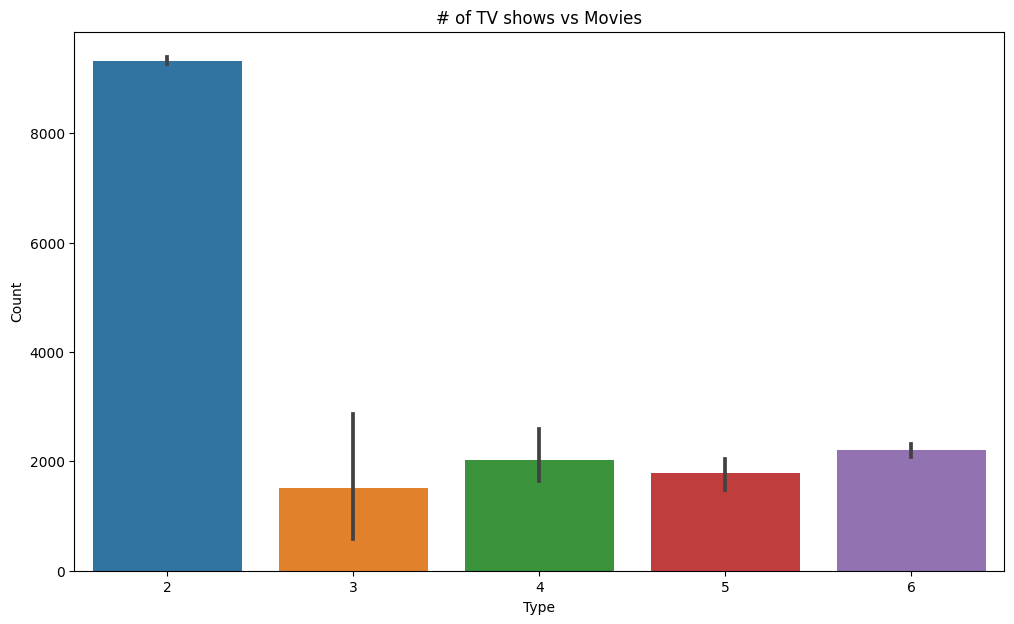

In [46]:
id_types = data['id'].value_counts()
plt.figure(figsize=(12,7))
sns.barplot(x=id_types.values,y=id_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

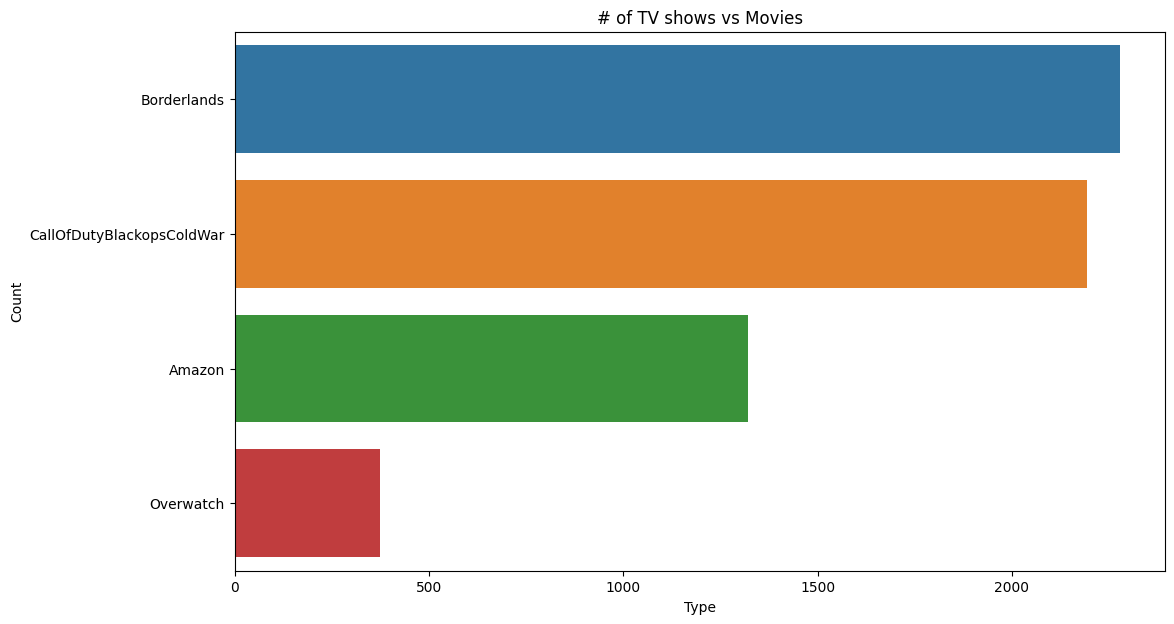

In [47]:
game_types = data['game'].value_counts()
plt.figure(figsize=(12,7))
sns.barplot(x=game_types.values,y=game_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

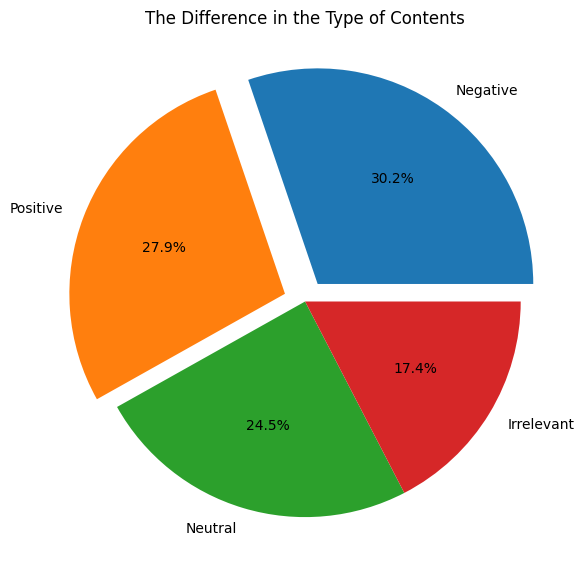

In [48]:
sentiment_types = data['sentiment'].value_counts()
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()

In [49]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [50]:
data['sentiment']=label_encoder.fit_transform(data['sentiment'])
data['game']=label_encoder.fit_transform(data['game'])
v_data['sentiment']=label_encoder.fit_transform(v_data['sentiment'])
v_data['game']=label_encoder.fit_transform(v_data['game'])

In [51]:
data = data.drop(['id'],axis=1)

data

,game,sentiment,text
23,1,1,the biggest dissappoinment in my life came out...
24,1,1,The biggest disappointment of my life came a y...
25,1,1,The biggest disappointment of my life came a y...
26,1,1,the biggest dissappoinment in my life coming o...
27,1,1,For the biggest male dissappoinment in my life...
...,...,...,...
5603,0,2,An amazing read aloud book for you and your ch...
5604,0,2,An amazing reading book for you and your child...
5605,0,2,An amazing book to read aloud for you and your...
5606,0,2,An amazing read aloud book for you and your ch...


In [52]:
data.nunique()

game            4
sentiment       4
text         5854
dtype: int64

In [53]:
v_data.nunique()

id           999
game          32
sentiment      4
text         998
dtype: int64